Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [1]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/electricity/7A'
data_address2 = '/home/dev/deepts/experiments/deep_ar/electricity/6A'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

101it [00:00, 29680.14it/s]
100%|###########| 100/100 [00:04<00:00, 23.84it/s]


In [6]:
# read the second results
metrics_list2 = read_csv_result('metrics.csv', data_address2)

101it [00:00, 31215.44it/s]
100%|###########| 100/100 [00:04<00:00, 24.70it/s]


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)
sort_metric_list(metrics_list2)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,201.236165,270.903564,235.0,9.791667,8.031874,1.405357,2.867487,0.752681,NaN,30.065092,251.480861,0.708333,270.903529,0.958333,88.063585,1.000000
1,321,0.0,115.575724,196.189148,264.0,11.000000,8.026991,1.018383,1.959425,0.691471,NaN,25.286467,155.523003,0.541667,196.189157,0.791667,114.747170,0.875000
2,642,0.0,163.393504,253.373138,284.0,11.833333,8.025109,1.315523,1.711095,0.723348,NaN,30.185729,208.674636,0.750000,253.373154,0.916667,118.474028,0.916667
3,963,0.0,122.346710,226.938919,189.0,7.875000,8.024132,1.178419,2.296112,0.849825,NaN,30.549057,260.155552,0.875000,226.938930,0.875000,60.929320,1.000000
4,1284,0.0,20.895597,73.803986,166.0,6.916667,8.019890,0.383442,0.708178,0.467564,NaN,9.809795,39.441866,0.250000,73.803988,0.416667,65.994525,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,41859.359375,4328.768555,74254.0,3093.916667,287.494114,0.627371,0.060022,0.062306,NaN,4.459930,2003.600293,0.000000,4328.768799,0.041667,1190.268213,0.583333
2243,1283,320.0,131098.572917,8168.035156,78719.0,3279.958333,287.257349,1.184773,0.103887,0.110046,NaN,18.937011,2697.404932,0.000000,8168.035156,0.000000,5425.503662,0.166667
2244,1604,320.0,59728.197917,5092.566406,74298.0,3095.750000,287.146950,0.738961,0.066275,0.069216,NaN,8.732626,2078.027686,0.000000,5092.566406,0.083333,2552.043018,0.500000
2245,1925,320.0,34865.544271,4130.916016,68217.0,2842.375000,287.030085,0.599664,0.059352,0.061461,NaN,2.704289,1796.827295,0.000000,4130.915771,0.000000,675.019922,0.833333


In [11]:
metrics_exp_list = [metrics_list1, metrics_list2]

In [12]:
metrics_exp_np = get_metric_list_np(metrics_exp_list)
metrics_exp_np.shape

(2, 2247, 18)

In [13]:
metrics_exp_np.std(axis=0).shape

(2247, 18)

In [14]:
pd.DataFrame(metrics_exp_np.std(axis=0))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,7.621816,4.510239,0.0,0.0,0.0,0.023398,0.037434,0.005349,NaN,3.580279,29.469706,0.041667,4.510224,0.020833,0.561327,0.000000
1,0.0,0.0,15.342921,22.563965,0.0,0.0,0.0,0.117125,0.267139,0.047626,NaN,1.638195,24.131901,0.104167,22.563969,0.041667,3.877556,0.000000
2,0.0,0.0,17.600978,18.717453,0.0,0.0,0.0,0.097182,0.143704,0.032851,NaN,0.577056,10.005243,0.041667,18.717445,0.000000,0.882188,0.020833
3,0.0,0.0,32.269618,26.661339,0.0,0.0,0.0,0.138444,0.263085,0.040468,NaN,1.039504,6.884342,0.041667,26.661348,0.041667,11.304057,0.000000
4,0.0,0.0,1.040717,1.589451,0.0,0.0,0.0,0.008258,0.006801,0.004487,NaN,0.099583,0.266174,0.020833,1.589451,0.020833,2.129812,0.020833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,0.0,0.0,16191.875000,1300.574341,0.0,0.0,0.0,0.188493,0.018963,0.020228,NaN,1.345091,481.242432,0.000000,1300.574463,0.229167,105.409546,0.208333
2243,0.0,0.0,50188.283854,2430.705444,0.0,0.0,0.0,0.352574,0.031542,0.034000,NaN,7.329710,442.752563,0.000000,2430.705444,0.041667,2025.660962,0.333333
2244,0.0,0.0,21524.544271,1175.988403,0.0,0.0,0.0,0.170643,0.014865,0.016468,NaN,3.206070,455.130078,0.020833,1175.988403,0.250000,576.284521,0.229167
2245,0.0,0.0,14492.832682,1230.470825,0.0,0.0,0.0,0.178621,0.017100,0.018224,NaN,0.543239,372.122656,0.000000,1230.470703,0.270833,250.664429,0.083333


In [15]:
different_indexes_list = get_different_idx(metrics_list1, metrics_list2)

In [16]:
len(different_indexes_list)

100

# Forecast section

In [17]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 30326.06it/s]
100%|###########| 100/100 [06:49<00:00,  4.10s/it]
101it [00:00, 31358.70it/s]
100%|###########| 100/100 [06:53<00:00,  4.14s/it]


In [18]:
len(forcast_list1)

100

In [19]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)
sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [20]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,11.961935,15.654492,15.136734,13.209858,12.867196,10.052355,...,15.808441,10.669181,17.359013,15.327891,8.687950,14.667314,0,12.322561,5.202258,0.121515
1,1,0,2014-05-26 21:00:00,10.0,11.824523,24.805973,19.967112,17.679022,22.155514,19.866695,...,13.520203,18.115847,23.690882,17.489159,19.214440,23.895077,0,21.342812,7.269005,0.109341
2,1,0,2014-05-26 22:00:00,22.0,15.014298,18.445555,17.901258,18.584352,29.242400,22.225798,...,15.193828,12.740971,16.707033,16.911291,14.757359,20.156687,0,20.074380,4.976992,0.139955
3,1,0,2014-05-26 23:00:00,20.0,22.948257,20.853636,21.129284,22.149366,25.344713,23.511322,...,21.011484,20.229443,23.374573,21.974800,22.017101,21.938414,0,22.124388,2.740837,0.167287
4,1,0,2014-05-27 00:00:00,13.0,18.234413,21.387882,20.731590,21.327932,21.503178,20.459260,...,20.471102,21.450780,19.825846,20.447130,20.289469,27.349825,0,21.705634,1.847438,0.171213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,3269.561300,3676.306600,3614.615700,3562.225300,3235.704300,3522.366000,...,2892.327400,3326.790000,3154.859400,4040.869000,3307.841600,3641.153600,320,3329.555847,211.353850,0.132542
53924,1,2246,2014-06-02 16:00:00,4120.0,3379.568400,3748.141600,3292.719200,3606.719500,3369.217800,3296.553500,...,3290.890100,3193.430700,3535.188200,3468.765600,3572.044700,3875.054200,320,3376.606158,238.233298,0.127459
53925,1,2246,2014-06-02 17:00:00,3951.0,3574.928500,3481.279500,3386.651400,3512.681000,3488.493200,3278.032200,...,2951.863500,3342.120000,2616.492400,3344.820800,3359.034400,3653.078900,320,3373.923383,316.930112,0.107169
53926,1,2246,2014-06-02 18:00:00,3907.0,3310.098400,3797.062300,3341.516800,3460.590600,2916.818800,3206.336200,...,3018.685300,3236.528000,2547.326400,2320.578900,3426.134000,3399.713000,320,3255.239366,263.477322,0.134299


In [21]:
target_forcast_series = get_forcast_target(forcast_list1)

In [22]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

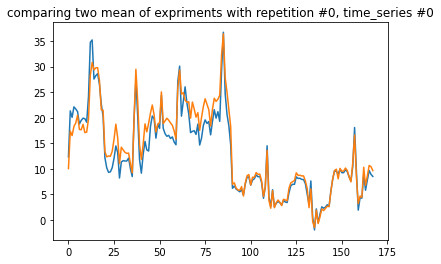

In [23]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
ts_list2[rep_no]['mean'].plot()

### show repetiitons in A and B, which A is bigger than B and the difference is maximum

maximum difference is 8263635.9837772995


2534463.0505617997

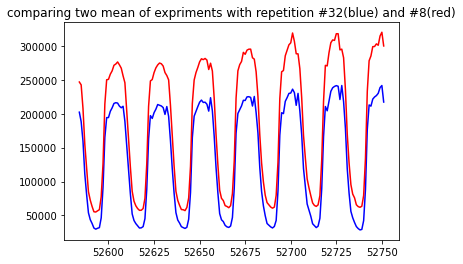

In [81]:

ts_no = 313
higher_flag = False
idx_dif, mx_dif, l_list = get_max_diff_id(ts_no, sorted_forcast_list1, sorted_forcast_list2, higher_flag)

ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plot_2_ts(ts_list1, ts_list2, idx_dif[0], idx_dif[1])
# ts_list1[0]['target'].plot(color='black')
print(f'maximum difference is {mx_dif}')
# l_list
abs((ts_list1[4]['mean'] - ts_list2[3]['mean']).sum())

### show repetiitons in A and B, which A is bigger than B and the difference is maximum

maximum difference is 6527.78779443


1821.8789032938002

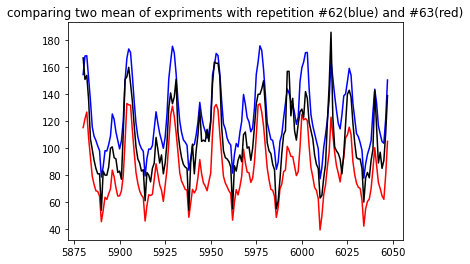

In [83]:
ts_no = 35
higher_flag = True
idx_dif, mx_dif, l_list = get_max_diff_id(ts_no, sorted_forcast_list1, sorted_forcast_list2, higher_flag)

ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plot_2_ts(ts_list1, ts_list2, idx_dif[0], idx_dif[1])
ts_list1[0]['target'].plot(color='black')
print(f'maximum difference is {mx_dif}')
# l_list
abs((ts_list1[4]['mean'] - ts_list2[3]['mean']).sum())

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [105]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[37]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[60]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[81]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# experiment B
expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [109]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])

underpred_B_best = compare_two_series(expB_best_compare[True], expB_best_compare[False])
underpred_B_worst = compare_two_series(expB_worst_compare[True], expB_worst_compare[False])
underpred_B_highest = compare_two_series(expB_highest_compare[True], expB_highest_compare[False])

print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')

print(f'\npercentage of underprediction of worst repetition for experiment B = {underpred_B_worst}')
print(f'percentage of underprediction of best repetition for experiment B = {underpred_B_best}')
print(f'percentage of underprediction of highest repetition for experiment B = {underpred_B_highest}')
print(f'in expB the lowest and worse are the same')


percentage of underprediction of worst repetition for experiment A = 0.9409212283044058
percentage of underprediction of best repetition for experiment A = 0.5142412105028927
percentage of underprediction of highest repetition for experiment A = 0.08715324135884883
percentage of underprediction of lowest repetition for experiment A = 0.9419781931464174

percentage of underprediction of worst repetition for experiment B = 0.9646565791425604
percentage of underprediction of best repetition for experiment B = 0.643765761756416
percentage of underprediction of highest repetition for experiment B = 0.07485907135439845
in expB the lowest and worse are the same


(0.0, 1000.0)

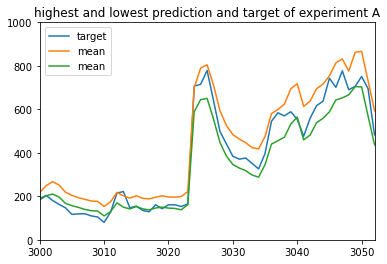

In [115]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[68]['mean'].plot(legend=True)
sorted_forcast_list1[81]['mean'].plot(legend=True)
plt.xlim([3000,3052])
plt.ylim([0,1000])

(0.0, 1000.0)

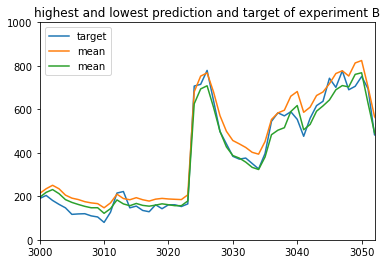

In [113]:
plt.title('highest and lowest prediction and target of experiment B')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[63]['mean'].plot(legend=True)
sorted_forcast_list1[8]['mean'].plot(legend=True)
plt.xlim([3000,3052])
plt.ylim([0,1000])

In [104]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list2, high_flag=True)
# get_highest_prediction_id(sorted_forcast_list2, high_flag=False)

8

In [125]:
# find max difference between each experiments with itself and also combined
combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [127]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
print(f'the most different tuples of experiment B is: {expB_max_tuple}')
print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (68, 32)
the most different tuples of experiment B is: (8, 63)
the most different tuples of Combined experiments is: (108, 163)


## find the tuples for all the time series (it takes much time)

In [119]:
# get all the 321 pairs here
lower_pair_list = []
higher_pair_list = []

for i in range(321):
    # lower values
    higher_flag = False
    idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    lower_pair_list.append(idx_dif)
    break
    # higher values
    # higher_flag = True
    # idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    # higher_pair_list.append(idx_dif)


In [ ]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

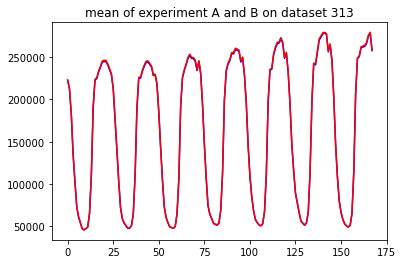

In [124]:
ts_no = 313

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
for idx, ts_df2 in enumerate(ts_list2):
    means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue')
plt.plot(mean_means_B, color='red')
# plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

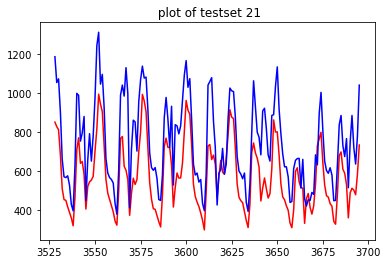

In [118]:
ts_no = 21
# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plt.title(f' plot of testset {ts_no}')
ts_list2[63]['mean'].plot(color='r')
# ts_list2[50]['mean'].plot(color='g')
ts_list2[63]['target'].plot(color='b')
